<a href="https://colab.research.google.com/github/Shrutiuttekar/Python/blob/main/MCA2302118_Assignment1(AI%2C_ML)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Result analysis and Student Performance Prediction**


* Name: Shruti Santosh Uttekar
* Rollno: MCA2302118
* Class: B
* Subject: Artificial intelligence and Machine Learning

### Research Questions:

* **1. Distribution of Scores:**

**Q1. What is the distribution of Internal and End-term scores for each subjects? How are the total scores(internal and end-term) distributed across different subjects?**

* First of all we will import the libraries like matplotlib, seaborn, pandas and numpy.
* **matplotlib:** allows users to create visualizations, such as plots, histograms, bar charts, and scatter plots, to display data.
* **seaborn:**a library for making statistical graphics in Python.
* **numpy:**used to perform mathematical and logical operations on large datasets.
* **pandas:** import and export tabular data in various formats, such as CSV or JSON .

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

* Now we are going to read the dataset

In [4]:
df =pd.read_excel('/content/Result Analysis.xlsx')

* **head():** used to read the first 5 rows from dataset.

In [5]:
df.head()

,Rollno,Name,Internal,End Term,Total of FM,Internal.1,End Term.1,Total of DBMS,Internal.2,End Term.2,...,Total of EVS,Internal.4,End Term.4,Total of IET,Internal.5,End Term.5,Total of Indian Economics,Internal.6,End Term.6,Total of Spreadsheet
0,BBA22006,Sharayu Dhale,26,55,81,25,60,85,22,40,...,93,22,61,83,26,64,90,25,62,87
1,BBA22016,Vikramkumar,24,50,74,26,55,81,23,65,...,76,26,56,82,21,58,79,25,58,83
2,BBA22030,Vidhi Assudani,25,65,90,25,48,73,22,58,...,80,21,62,83,20,65,85,28,45,73
3,BBA22033,Lav Choudhary,20,52,72,23,52,75,20,64,...,81,19,50,69,19,49,68,27,62,89
4,BBA22038,Nisha Shaw,21,52,73,18,48,66,25,52,...,69,18,45,63,24,65,89,21,50,71


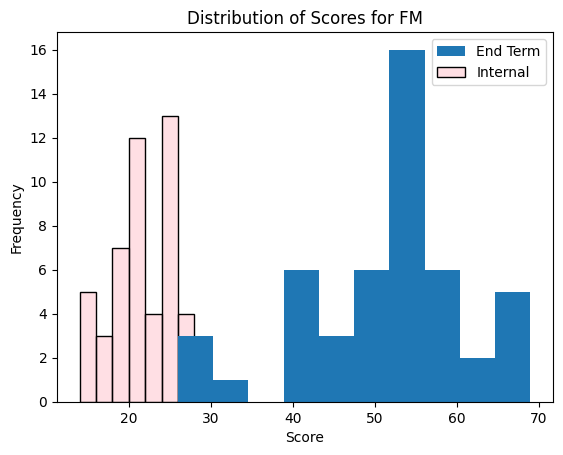

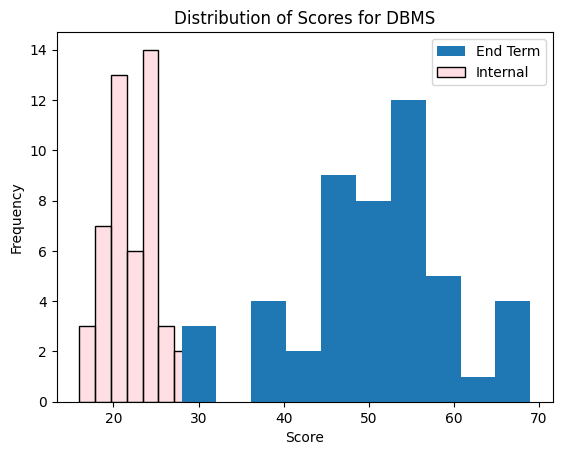

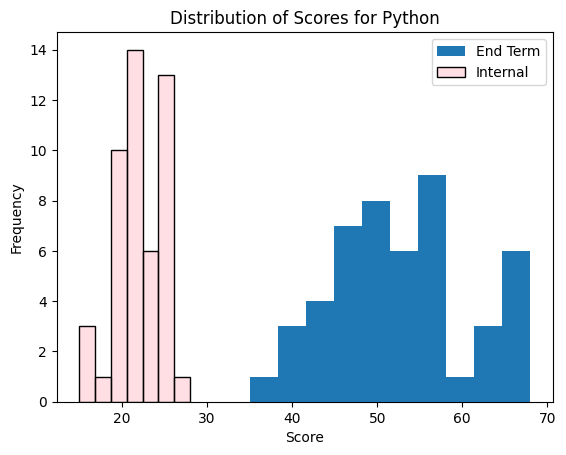

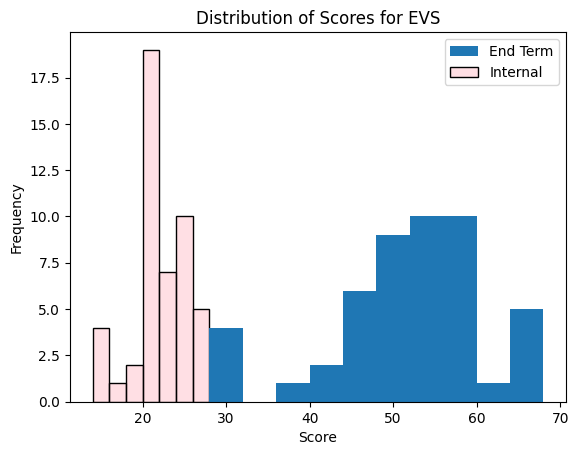

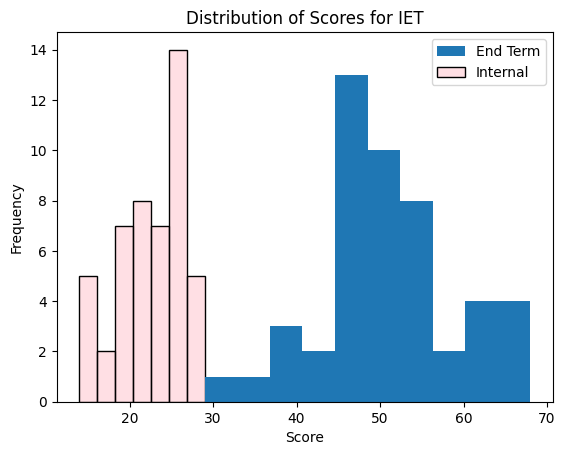

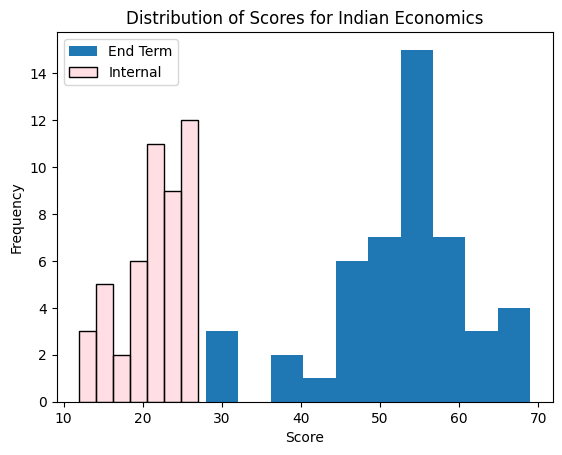

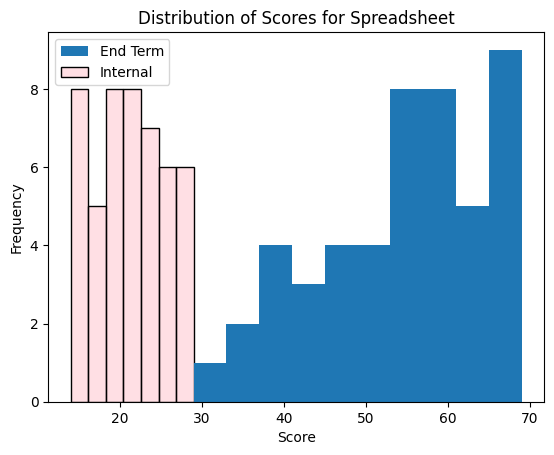

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

internal_marks=['Internal','Internal.1','Internal.2','Internal.3','Internal.4','Internal.5','Internal.6']
end_term_marks=['End Term','End Term.1','End Term.2','End Term.3','End Term.4','End Term.5','End Term.6']
subject_columns=['FM','DBMS','Python','EVS','IET','Indian Economics','Spreadsheet']

for i in range(len(subject_columns)):
  subject = subject_columns[i]
  plt.figure()
  sns.histplot(df[internal_marks[i]],  color='pink' ,alpha=0.5, label='Internal')
  plt.hist(df[end_term_marks[i]], alpha=1, label='End Term')
  plt.title(f'Distribution of Scores for {subject}')
  plt.xlabel('Score')
  plt.ylabel('Frequency')
  plt.legend()
  plt.show()

* Distribution of internal and end-term scroes for each subjects are been displayed with the help of histogram

* Now to Display the total score distributed across different subjects are as follows:

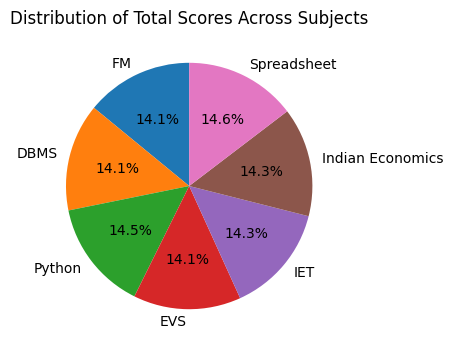

In [7]:
import matplotlib.pyplot as plt

subject_totals = []
for i in range(len(subject_columns)):
  subject_totals.append(df[internal_marks[i]].sum() + df[end_term_marks[i]].sum())

plt.figure(figsize=(4,4))
plt.pie(subject_totals, labels=subject_columns, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Total Scores Across Subjects')
plt.show()

* **2.Comparative Analysis:**

* **Q2. How do internal scores compare to end-term scores across different subjects? Which subject has the highest average total score?**

* Now let us compare internal scores with end-term scores.

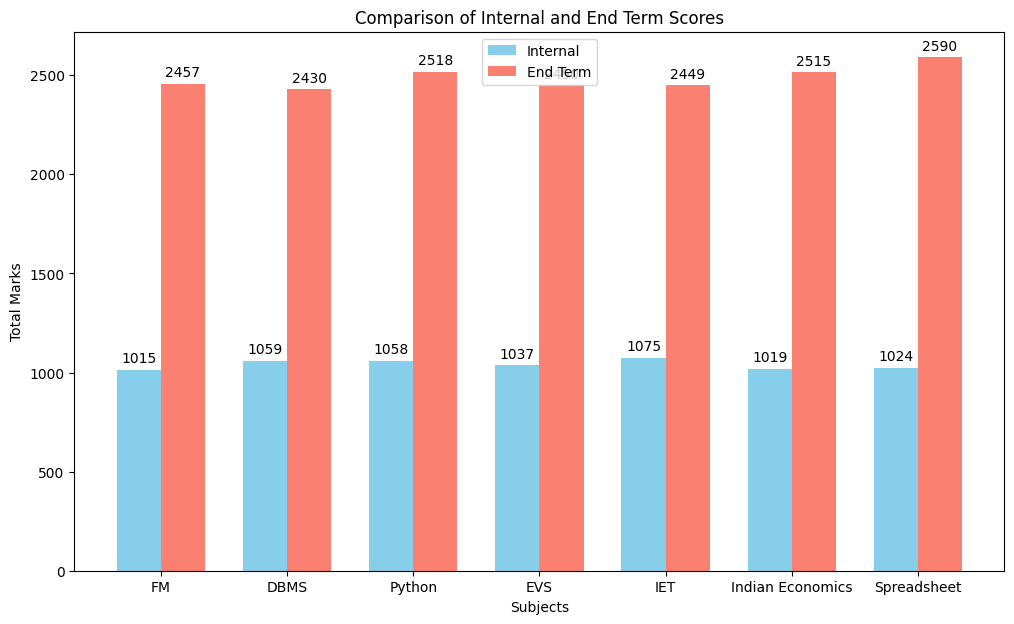

In [8]:
import matplotlib.pyplot as plt
import numpy as np
internal_totals = []
endterm_totals = []

for i in range(len(subject_columns)):
  internal_totals.append(df[internal_marks[i]].sum())
  endterm_totals.append(df[end_term_marks[i]].sum())

# Set the width of the bars
bar_width = 0.35


# Set the positions of the bars on the x-axis
index = np.arange(len(subject_columns))

fig, ax = plt.subplots(figsize=(12, 7))
rects1 = ax.bar(index, internal_totals, bar_width, label='Internal', color='skyblue')
rects2 = ax.bar(index + bar_width, endterm_totals, bar_width, label='End Term', color='salmon')

# Add labels, title, and legend
ax.set_xlabel('Subjects')
ax.set_ylabel('Total Marks')
ax.set_title('Comparison of Internal and End Term Scores')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(subject_columns)
ax.legend()

#Add data labels to the bars
def add_labels(rects):
   for rect in rects:
       height = rect.get_height()
       ax.annotate(f'{height}',
                   xy=(rect.get_x() + rect.get_width() / 2, height),
                  xytext=(0, 3),  # 3 points vertical offset
                   textcoords="offset points",
                   ha='center', va='bottom')


add_labels(rects1)
add_labels(rects2)


plt.show()


* Now we can see the comparison of internal scores and end-term scores.
* Let us find that which subject has the highest average total score.

In [10]:
# To Calculate average total score for each subject
average_scores = []
for i in range(len(subject_columns)):
  total_score = df[internal_marks[i]].sum() + df[end_term_marks[i]].sum()
  average_score = total_score / len(df)
  average_scores.append(average_score)

# Finding the index of the subject with the highest average score
highest_index = average_scores.index(max(average_scores))

# Displaying the results
print(f"The subject with the highest average total score is: {subject_columns[highest_index]}")
print(f"The average score is: {max(average_scores)}")

The subject with the highest average total score is: Spreadsheet
The average score is: 75.29166666666667


* **3.Correlation analysis:**

* **Q3. Is there a correlation between internal and end-term scores within each subject? How do scores in one subject correlate with scores in other subjects?**

In [11]:
# Calculating and displaying the correlations
for i in range(len(subject_columns)):
  correlation = df[internal_marks[i]].corr(df[end_term_marks[i]])
  print(f"Correlation between internal and end-term scores for {subject_columns[i]}: {correlation:.2f}")

Correlation between internal and end-term scores for FM: 0.37
Correlation between internal and end-term scores for DBMS: 0.17
Correlation between internal and end-term scores for Python: -0.04
Correlation between internal and end-term scores for EVS: 0.29
Correlation between internal and end-term scores for IET: 0.17
Correlation between internal and end-term scores for Indian Economics: 0.38
Correlation between internal and end-term scores for Spreadsheet: 0.07


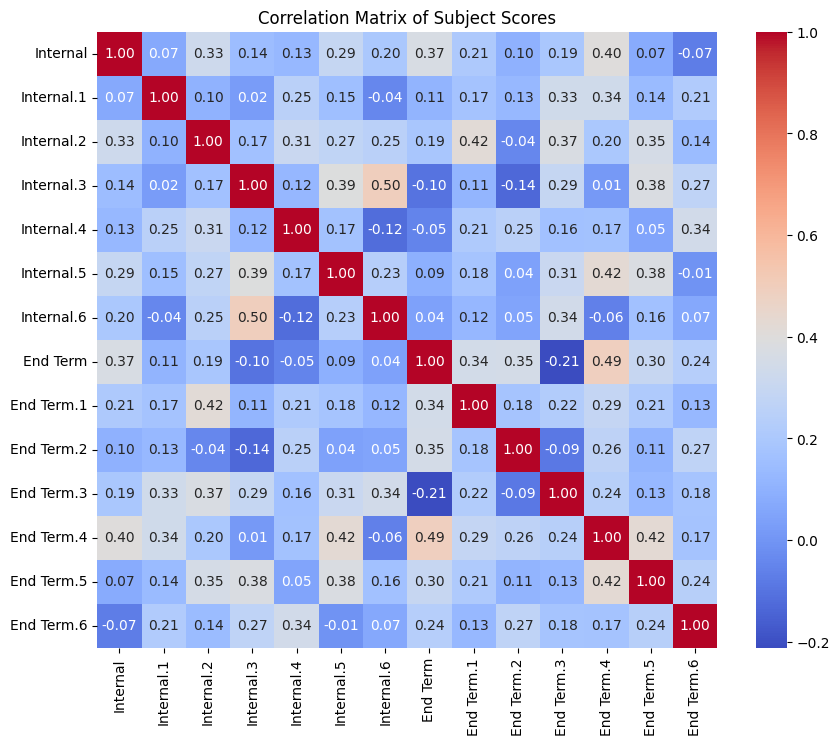

In [12]:
import matplotlib.pyplot as plt
# Calculate the correlation matrix
correlation_matrix = df[internal_marks + end_term_marks].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Subject Scores')
plt.show()

* Here we have clearly seen the corelation between internal and endterm with respect to each subject and also how one subject corelates with the sores of other subject.

* **4. Performance Insights:**

* **Q4.Which subject shows the greatest variability in student performance?Are there any subjects where students consistently perform better or worse?**

In [13]:
import pandas as pd
# To Calculate standard deviations for each subject (combining internal and end term)
std_devs = []
for i in range(len(subject_columns)):
  combined_scores = pd.concat([df[internal_marks[i]], df[end_term_marks[i]]])
  std_devs.append(combined_scores.std())

# Finding the index of the subject with the highest standard deviation
highest_std_index = std_devs.index(max(std_devs))

# Display the results
print(f"The subject with the greatest variability in student performance is: {subject_columns[highest_std_index]}")
print(f"The standard deviation is: {max(std_devs):.2f}")


The subject with the greatest variability in student performance is: Spreadsheet
The standard deviation is: 18.15


In [14]:
# Now to calculate average internal and end-term scores for each subject
average_internal_scores = []
average_endterm_scores = []

for i in range(len(subject_columns)):
  average_internal_scores.append(df[internal_marks[i]].mean())
  average_endterm_scores.append(df[end_term_marks[i]].mean())

# Comparing the  average scores so that we can identify consistent performance trends
for i in range(len(subject_columns)):
  if average_internal_scores[i] > average_endterm_scores[i]:
    print(f"Students tend to perform better in internals for {subject_columns[i]}")
  elif average_internal_scores[i] < average_endterm_scores[i]:
    print(f"Students tend to perform better in end terms for {subject_columns[i]}")
  else:
    print(f"Students perform similarly in internals and end terms for {subject_columns[i]}")


Students tend to perform better in end terms for FM
Students tend to perform better in end terms for DBMS
Students tend to perform better in end terms for Python
Students tend to perform better in end terms for EVS
Students tend to perform better in end terms for IET
Students tend to perform better in end terms for Indian Economics
Students tend to perform better in end terms for Spreadsheet


* Here we have seen that the "Spreadsheet" is the subject which shows greatest variability in students performance and students perform better end term examination in all of the subject

* **5.Top and Bottom Performance:**

* **Q5. Who are the top-performing students across all subjects?Are there any subjects where students particularly struggle?**

In [16]:
df['Total'] = df[internal_marks].sum(axis=1) + df[end_term_marks].sum(axis=1)
print(df[['Rollno','Name','Total']])


print("---------------------------------------------------------")
print("                                                          ")
print("                                                          ")
print("Top 5 performing students are : ")
top_5_students = df.sort_values(by='Total', ascending=False).head(9)
print(top_5_students[['Rollno','Name', 'Total']])


      Rollno                Name  Total
0   BBA22006       Sharayu Dhale    581
1   BBA22016         Vikramkumar    563
2   BBA22030      Vidhi Assudani    564
3   BBA22033       Lav Choudhary    538
4   BBA22038          Nisha Shaw    508
5   BBA22041        Shivam Kumar    519
6   BBA22042         Aryan Phale    535
7   BBA22043            Sundaram    544
8   BBA22044         Sneha Sinha    504
9   BBA22053      Mishruti Patel    570
10  BBA22062        Harshwardhan    570
11  BBA22067          Yash Lawte    337
12  BBA22069         Aryan Parde    483
13  BBA22078         Sweta Gupta    536
14  BBA22020         Shubhashree    571
15  BBA22081              Rasika    462
16  BBA22088       Chhavi Asnani    509
17  BBA22100              Anisha    538
18  BBA22101            Samridhi    497
19  BBA22106             Harshal    538
20  BBA22107        sneha kumari    557
21  BBA22113              Diksha    519
22  BBA22115             Pratham    492
23  BBA22117       Saswata Mitra    512


* Here are the result of 9 top performing Students from 47 students

In [17]:
average_scores_by_subject = df[['Total of FM', 'Total of DBMS', 'Total of EVS',
                                    'Total of IET', 'Total of Indian Economics',
                                    'Total of Spreadsheet']].mean()


struggling_subject = average_scores_by_subject.idxmin()
lowest_avg_score = average_scores_by_subject.min()

print(f"Students seem to be struggling the most in: {struggling_subject}")
print(f"Average score in this subject: {lowest_avg_score}")


Students seem to be struggling the most in: Total of DBMS
Average score in this subject: 72.27083333333333


* Here we found that DBMS is the subject in which most of the students are struggling whose average score is 72.27

* **6.Trend Analysis:**

* **Q6.Are there any trends in performance between internal and end-term scores across the subjects?
How do the total scores change from one subject to another for individual students?**

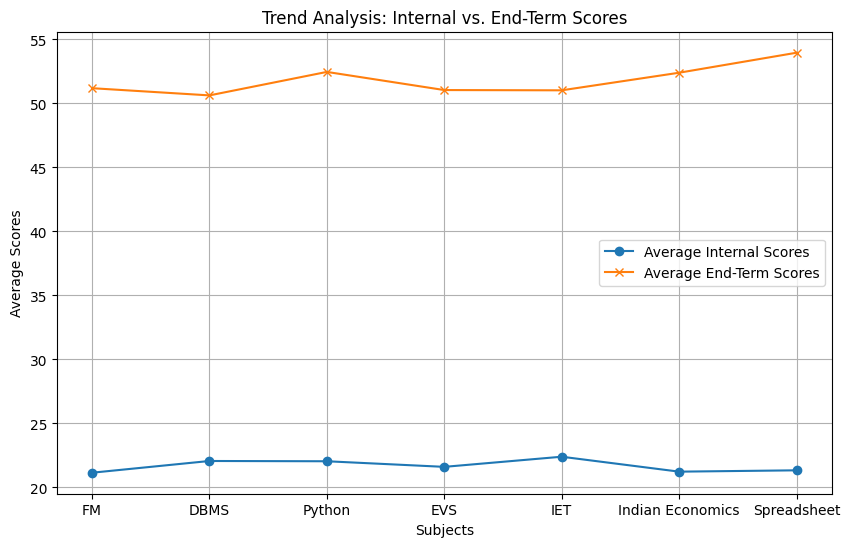

For FM, there's a trend of better performance in end-terms compared to internals.
For DBMS, there's a trend of better performance in end-terms compared to internals.
For Python, there's a trend of better performance in end-terms compared to internals.
For EVS, there's a trend of better performance in end-terms compared to internals.
For IET, there's a trend of better performance in end-terms compared to internals.
For Indian Economics, there's a trend of better performance in end-terms compared to internals.
For Spreadsheet, there's a trend of better performance in end-terms compared to internals.


In [18]:
import matplotlib.pyplot as plt
# Calculate average internal and end-term scores for each subject
average_internal_scores = []
average_endterm_scores = []

for i in range(len(subject_columns)):
  average_internal_scores.append(df[internal_marks[i]].mean())
  average_endterm_scores.append(df[end_term_marks[i]].mean())

# Plot the trends
plt.figure(figsize=(10, 6))
plt.plot(subject_columns, average_internal_scores, marker='o', label='Average Internal Scores')
plt.plot(subject_columns, average_endterm_scores, marker='x', label='Average End-Term Scores')
plt.xlabel('Subjects')
plt.ylabel('Average Scores')
plt.title('Trend Analysis: Internal vs. End-Term Scores')
plt.legend()
plt.grid(True)
plt.show()

# Analyze trends
for i in range(len(subject_columns)):
  if average_internal_scores[i] > average_endterm_scores[i]:
    print(f"For {subject_columns[i]}, there's a trend of better performance in internals compared to end-terms.")
  elif average_internal_scores[i] < average_endterm_scores[i]:
    print(f"For {subject_columns[i]}, there's a trend of better performance in end-terms compared to internals.")
  else:
    print(f"For {subject_columns[i]}, performance is relatively consistent between internals and end-terms.")


* Here with respect to trend analysis we have seen the comparison between internal scores and endterm score


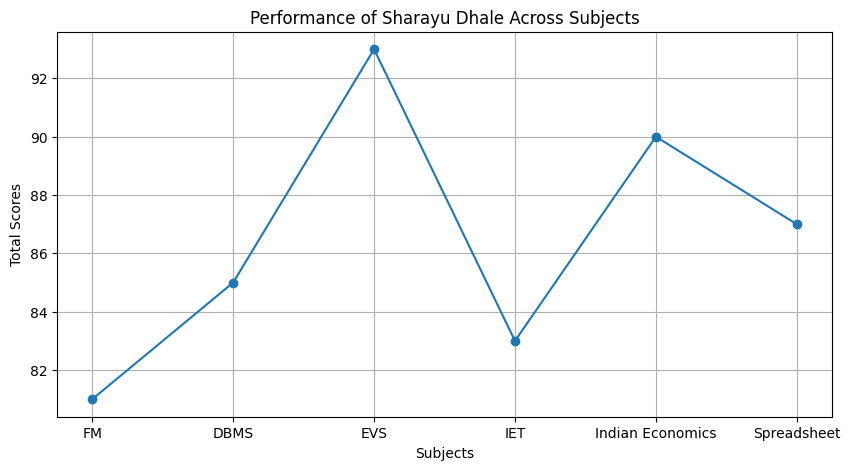

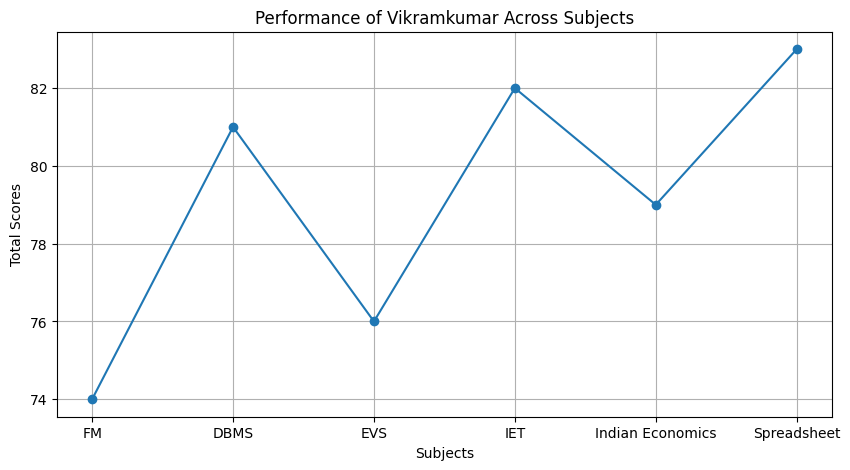

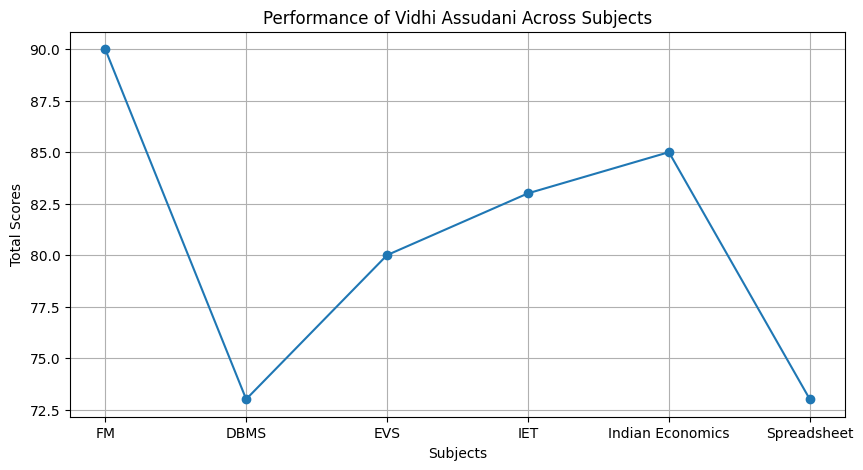

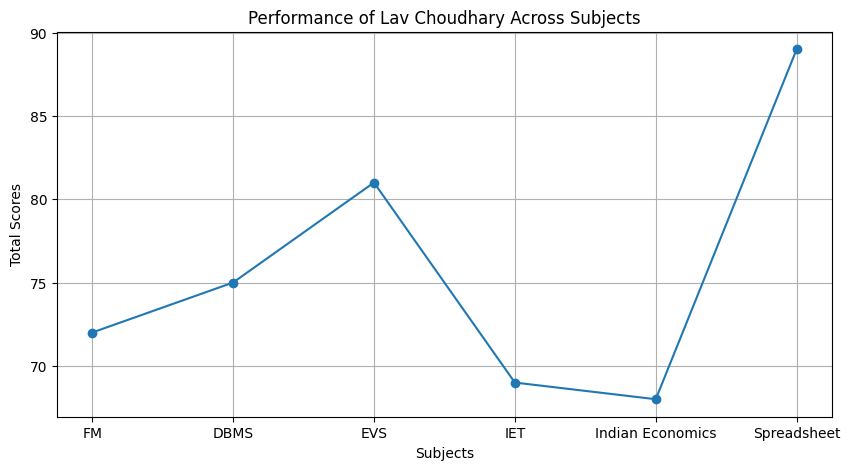

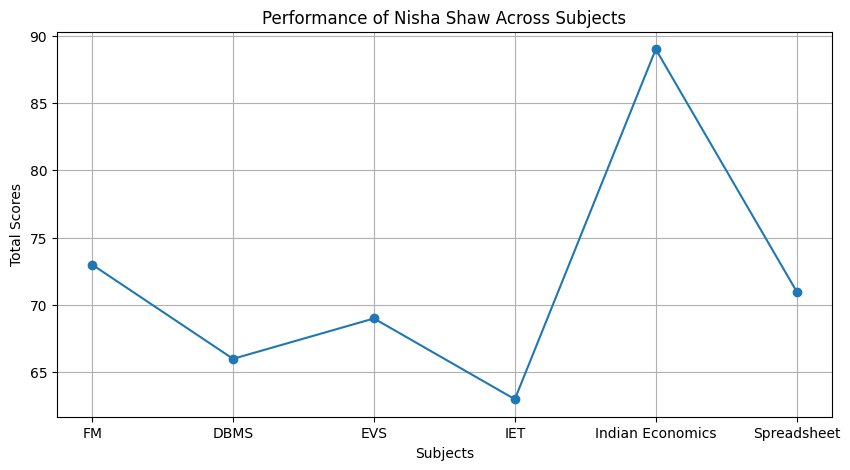

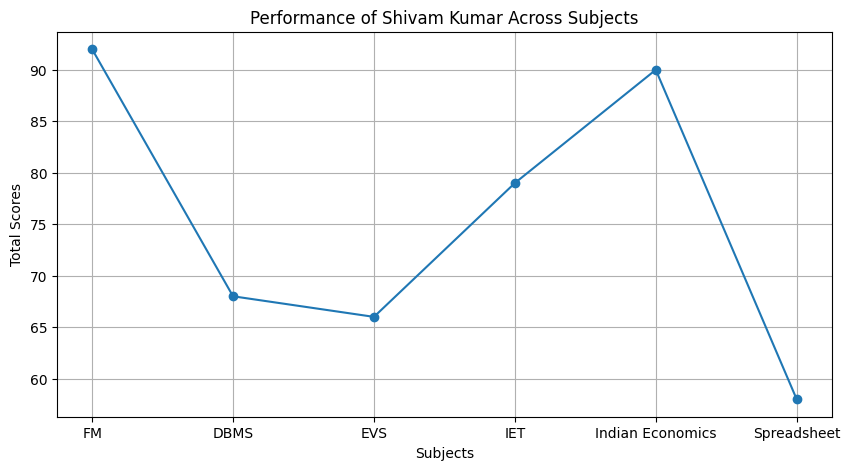

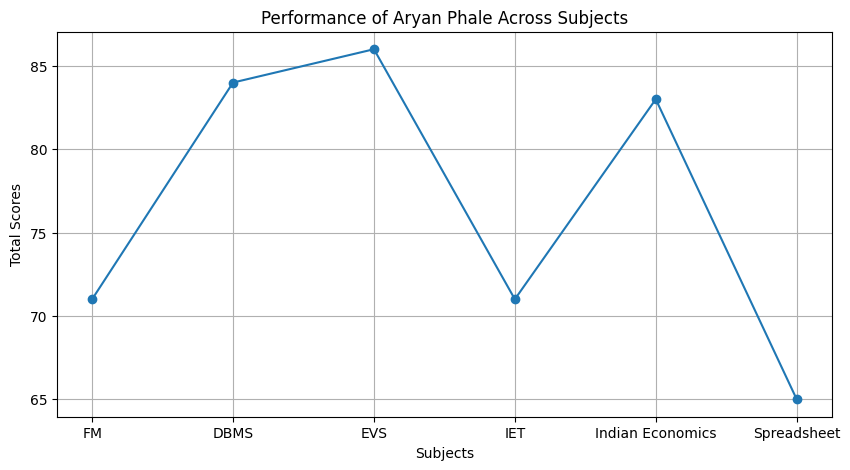

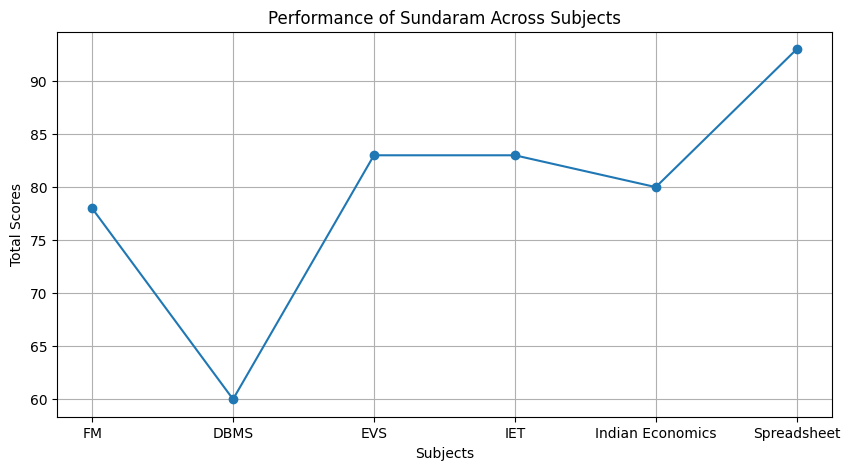

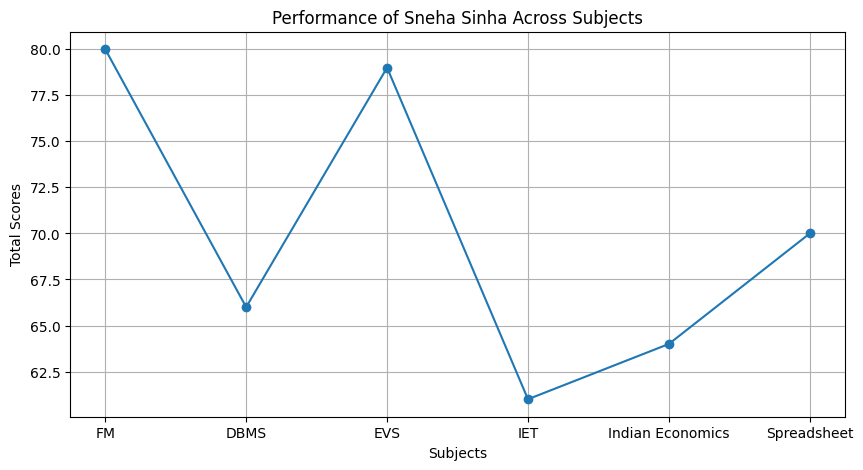

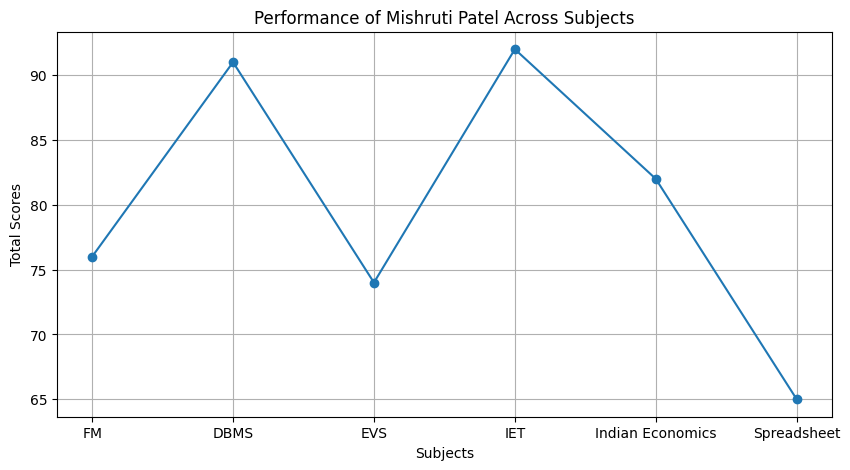

In [19]:
student_indices = range(0,10)

for idx in student_indices:
    student_name = df.loc[idx, 'Name']
    student_scores = df.loc[idx, ['Total of FM', 'Total of DBMS', 'Total of EVS',
                                        'Total of IET', 'Total of Indian Economics',
                                        'Total of Spreadsheet']].values

    plt.figure(figsize=(10, 5))
    plt.plot(['FM', 'DBMS', 'EVS', 'IET', 'Indian Economics', 'Spreadsheet'], student_scores, marker='o')
    plt.title(f"Performance of {student_name} Across Subjects")
    plt.xlabel("Subjects")
    plt.ylabel("Total Scores")
    plt.grid(True)
    plt.show()

* **7.Subject-wise performance:**

* **Q7.Which subject has the highest and lowest average internal scores?
Which subject has the highest and lowest average end-term scores?**


In [20]:
# To find the average internal scores for each subject
average_internal_scores = []
for i in range(len(subject_columns)):
  average_internal_scores.append(df[internal_marks[i]].mean())

# Calculating the indices of the subjects with the highest and lowest average internal scores
highest_internal_index = average_internal_scores.index(max(average_internal_scores))
lowest_internal_index = average_internal_scores.index(min(average_internal_scores))

# Displaying the subjects with the highest and lowest average internal scores
print(f"The subject with the highest average internal score is: {subject_columns[highest_internal_index]} with an average of {max(average_internal_scores):.2f}")
print(f"The subject with the lowest average internal score is: {subject_columns[lowest_internal_index]} with an average of {min(average_internal_scores):.2f}")


The subject with the highest average internal score is: IET with an average of 22.40
The subject with the lowest average internal score is: FM with an average of 21.15


In [21]:
# To find the average end-term scores for each subject
average_endterm_scores = []
for i in range(len(subject_columns)):
  average_endterm_scores.append(df[end_term_marks[i]].mean())

# Calculating the indices of the subjects with the highest and lowest average end-term scores
highest_endterm_index = average_endterm_scores.index(max(average_endterm_scores))
lowest_endterm_index = average_endterm_scores.index(min(average_endterm_scores))

# Displaying the subjects with the highest and lowest average end-term scores
print(f"The subject with the highest average end-term score is: {subject_columns[highest_endterm_index]} with an average of {max(average_endterm_scores):.2f}")
print(f"The subject with the lowest average end-term score is: {subject_columns[lowest_endterm_index]} with an average of {min(average_endterm_scores):.2f}")


The subject with the highest average end-term score is: Spreadsheet with an average of 53.96
The subject with the lowest average end-term score is: DBMS with an average of 50.62


* **8.Comparative Students Performance:**

* **Q8.How do individual student's performances vary across different subjects?
Are there students who perform consistently well or poorly across all subjects?**


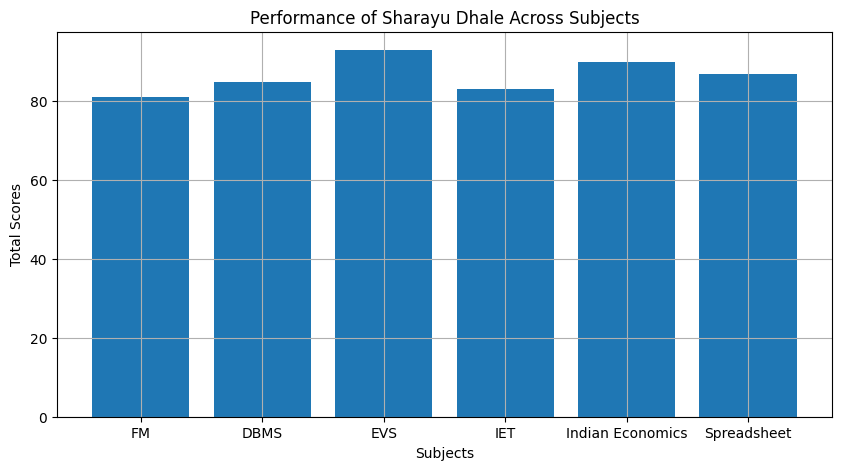

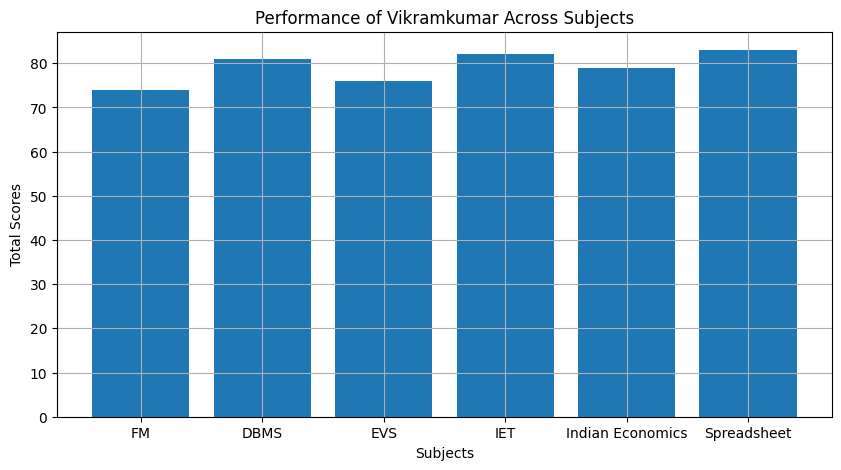

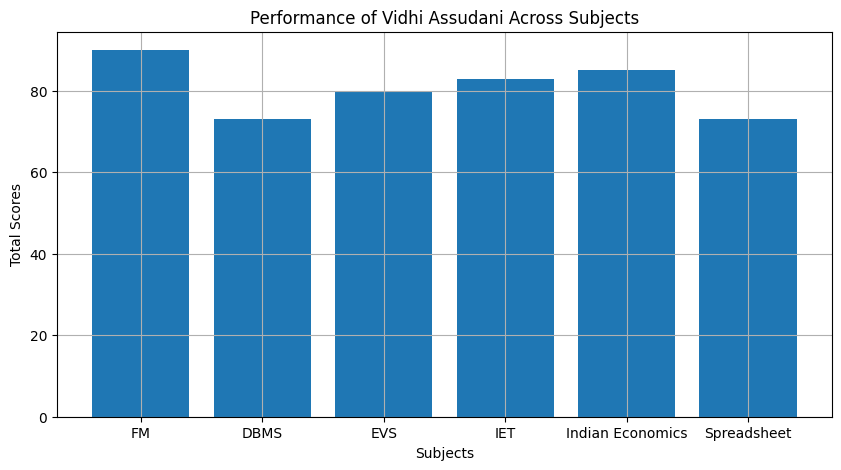

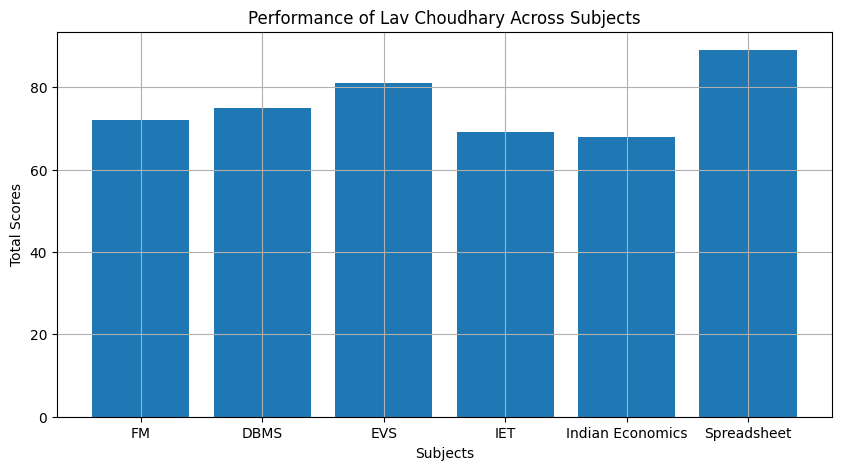

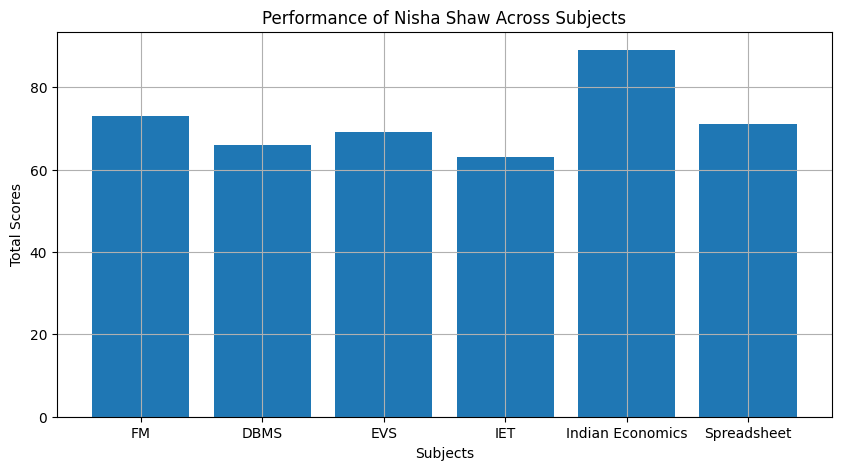

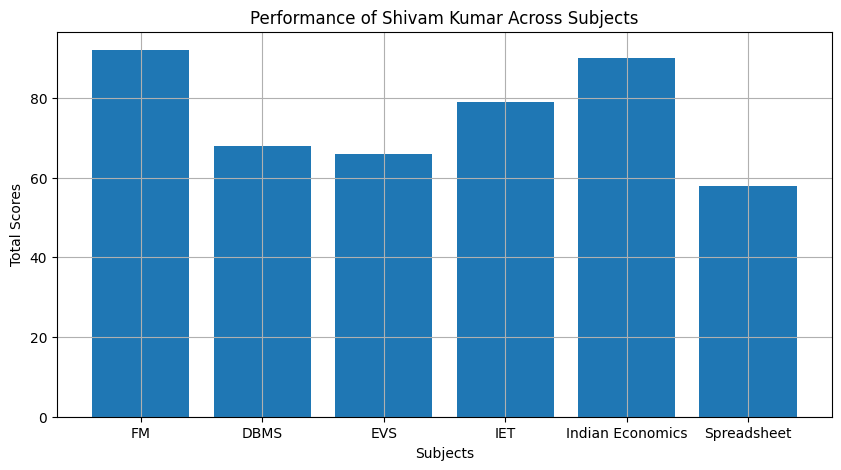

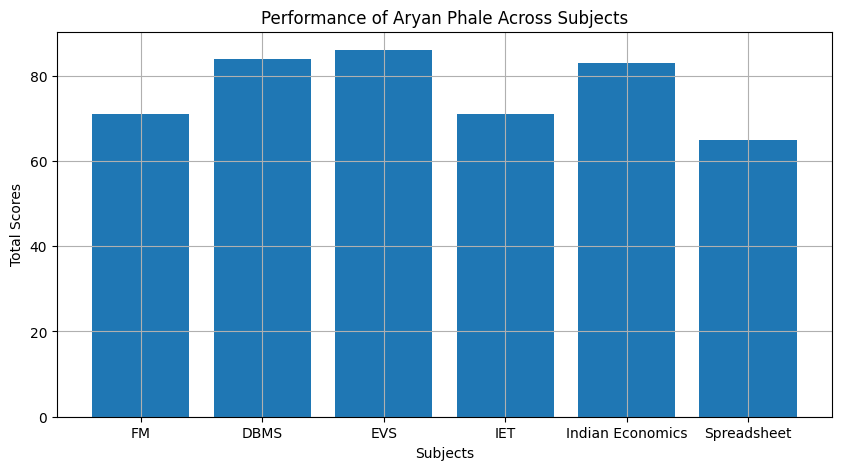

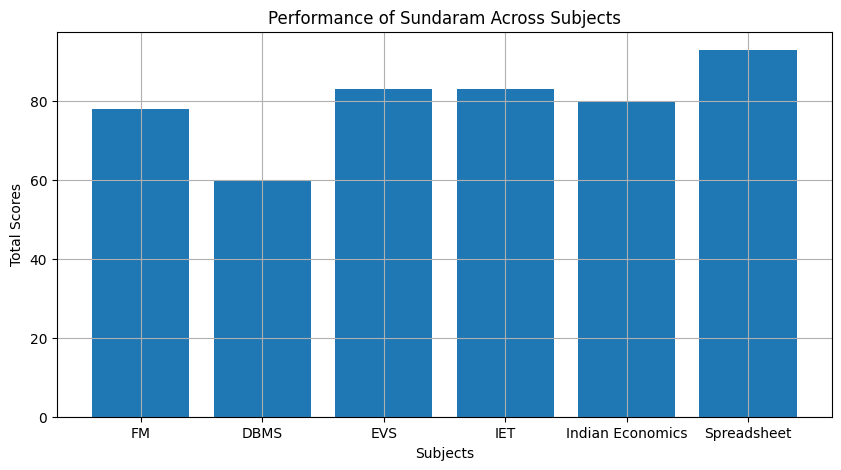

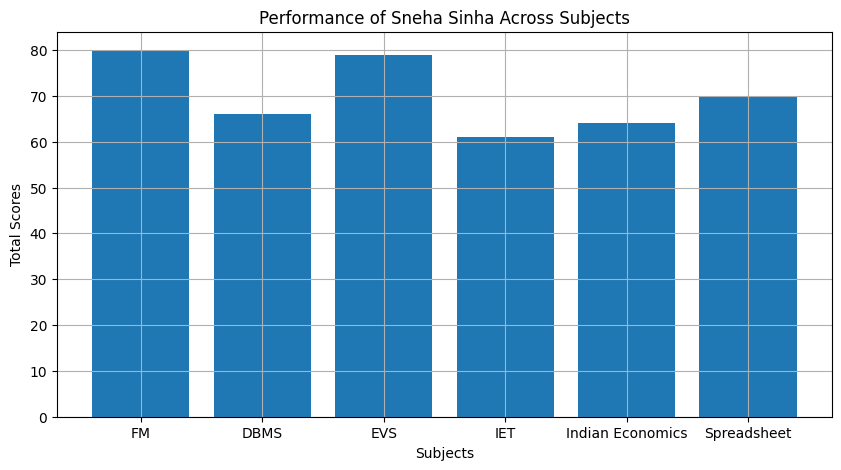

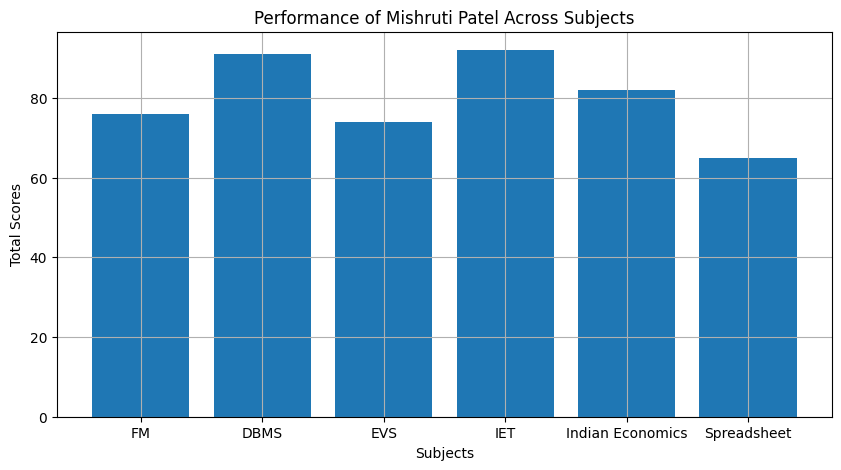

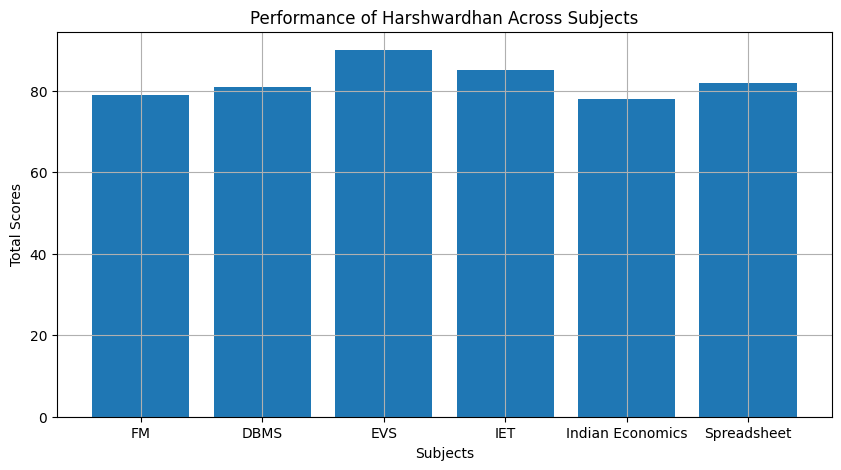

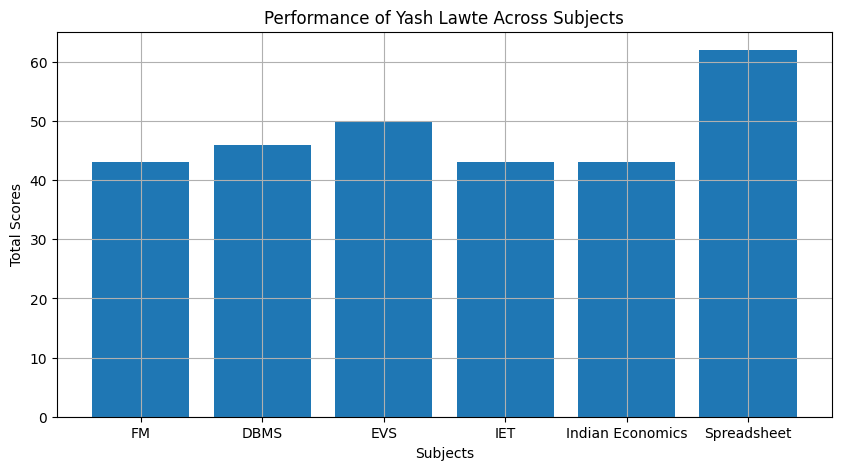

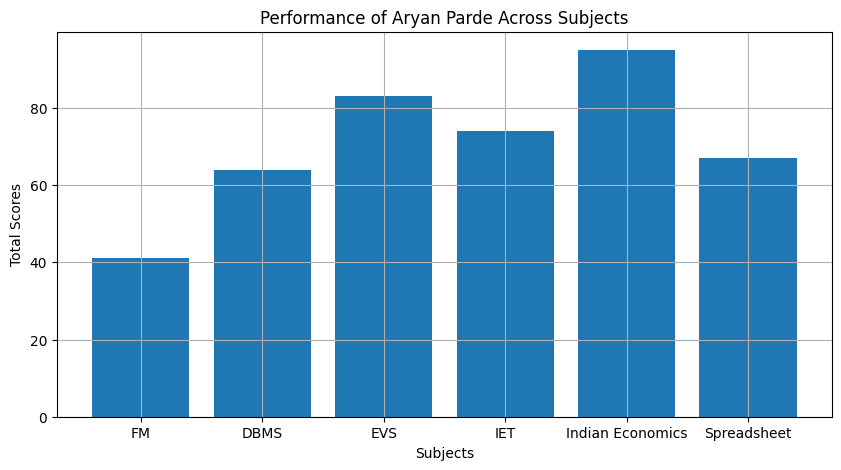

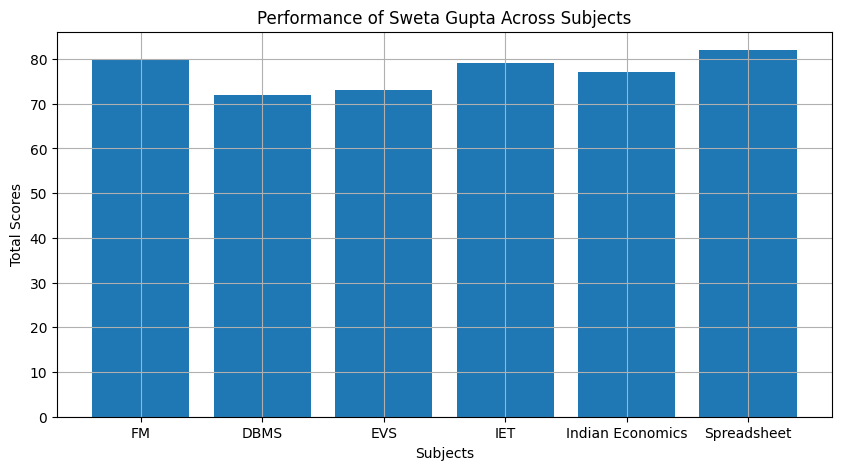

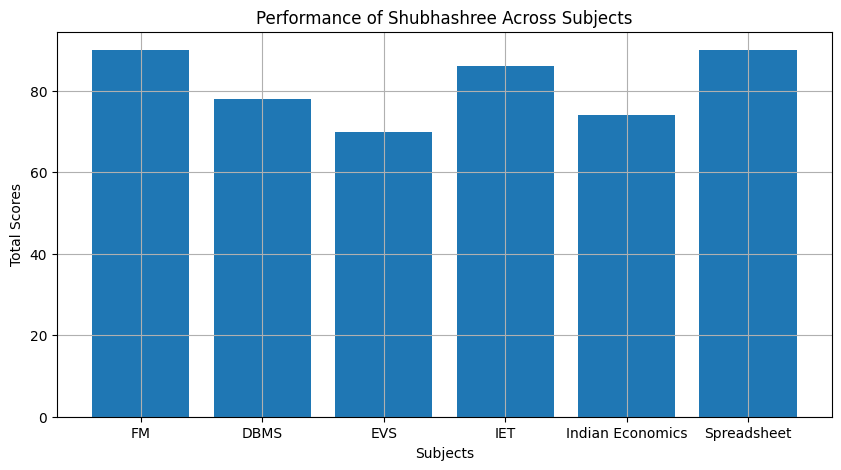

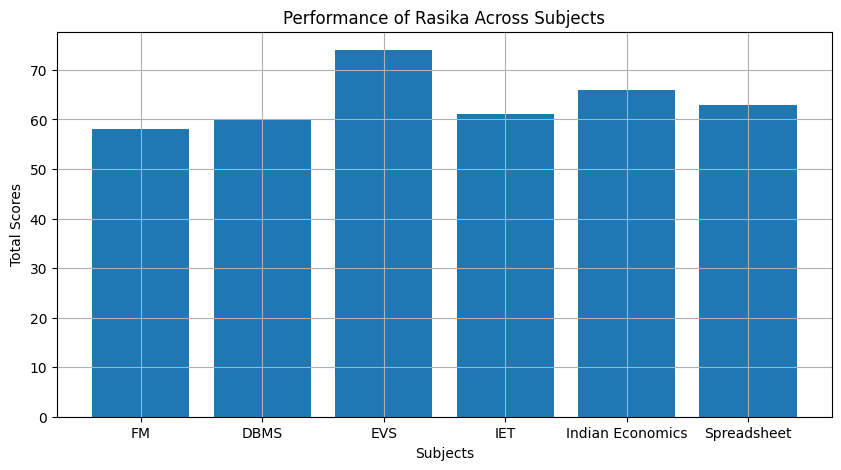

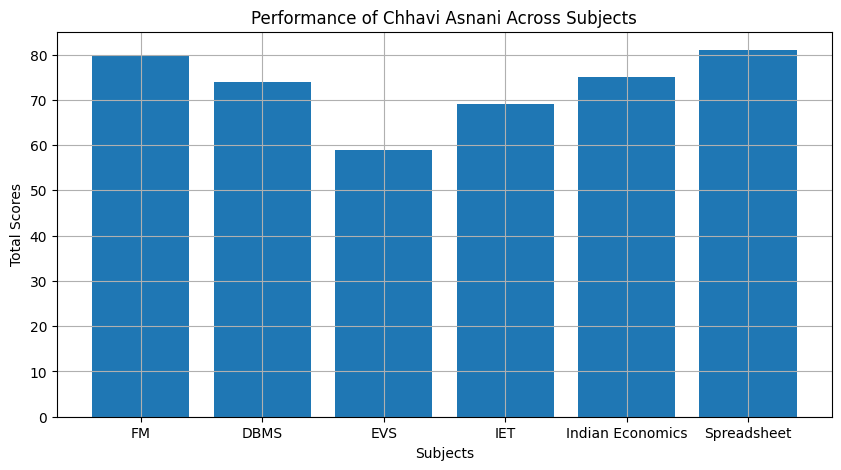

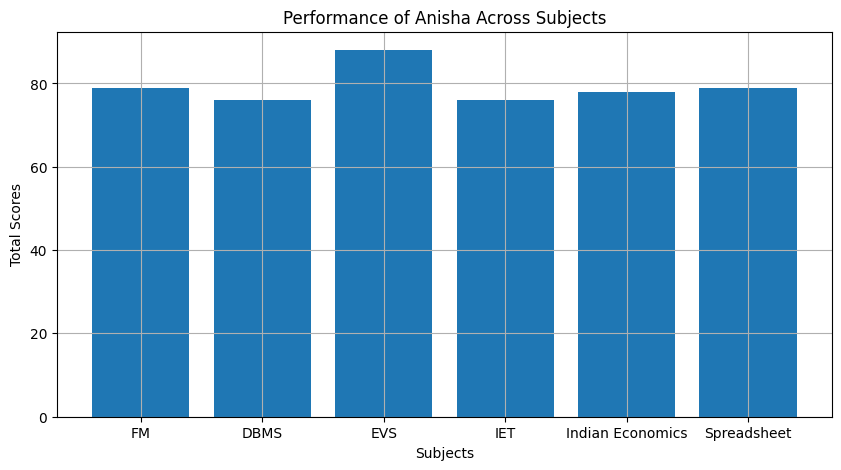

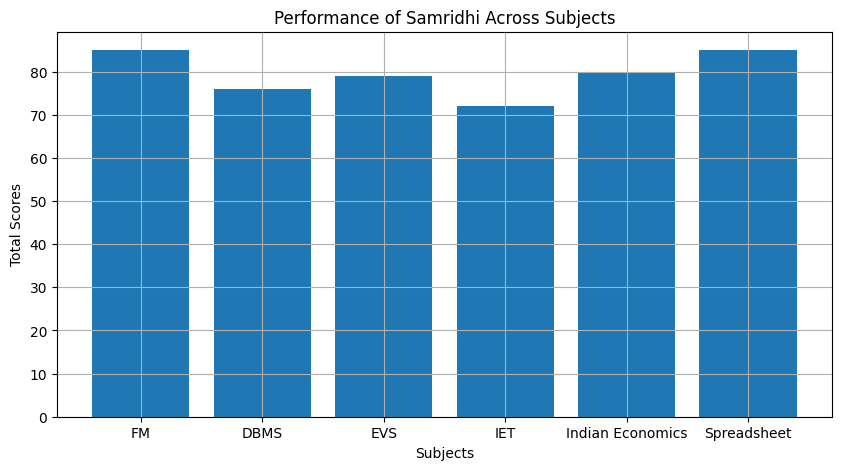

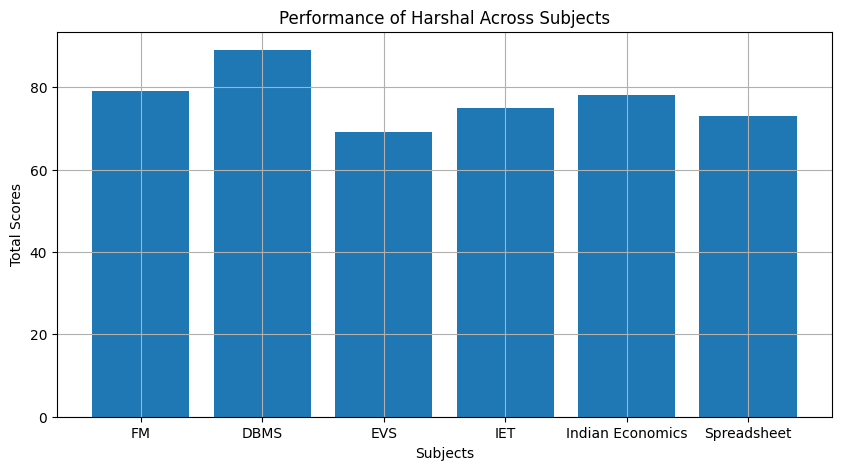

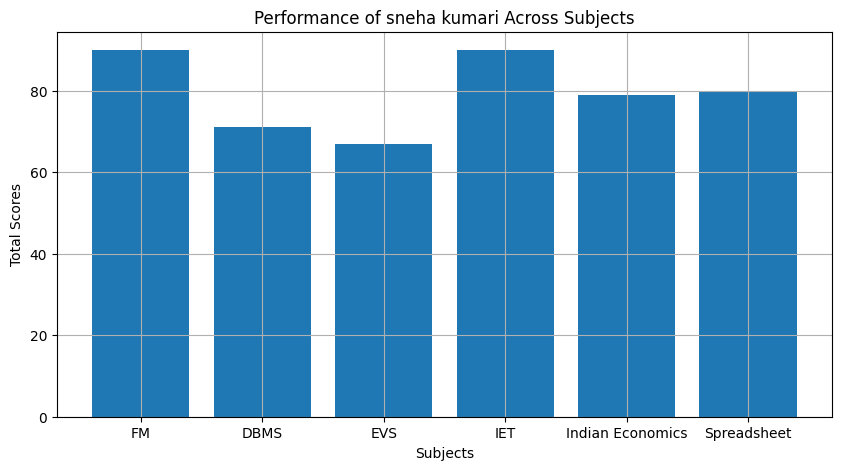

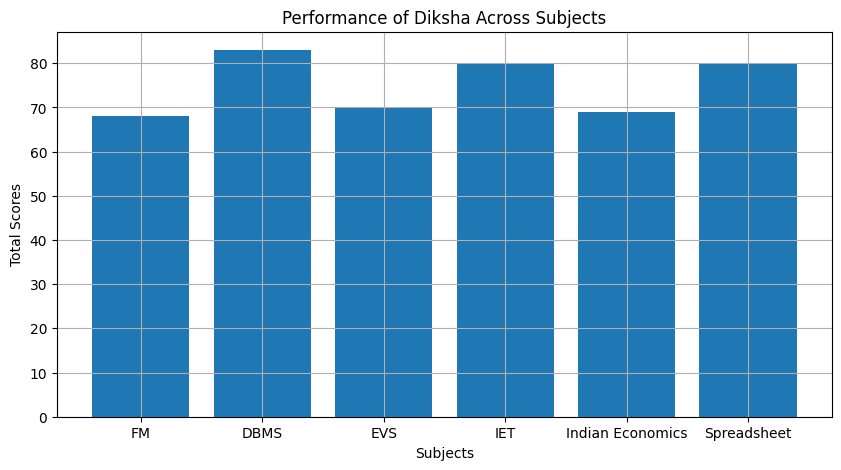

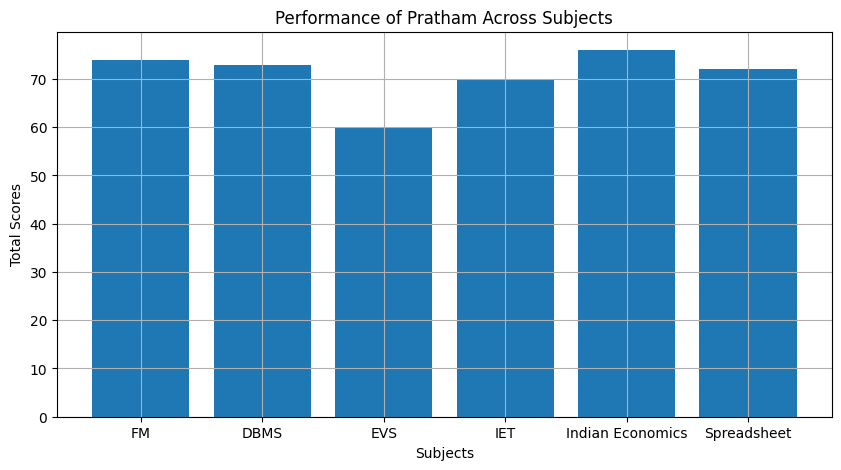

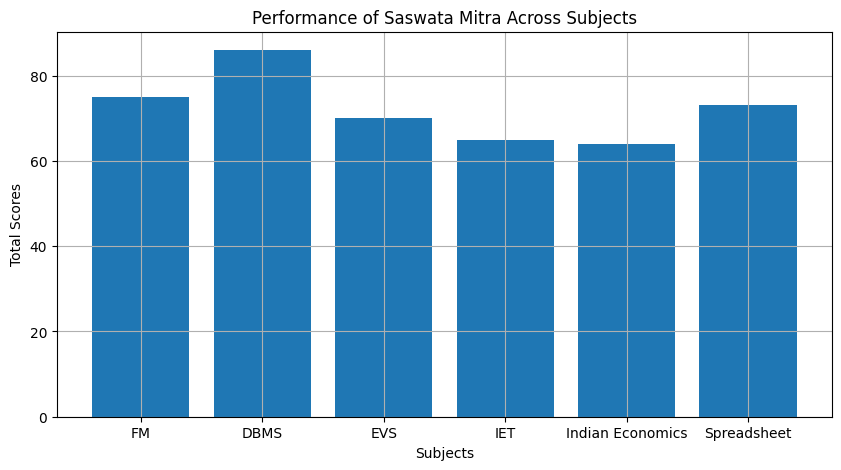

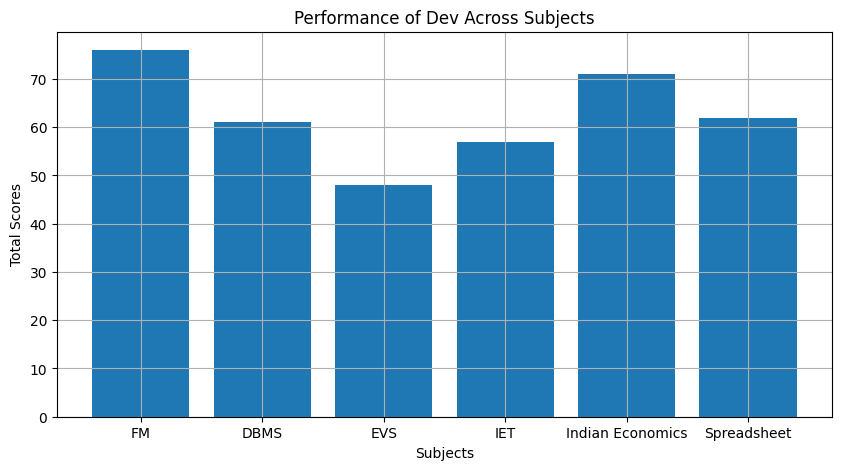

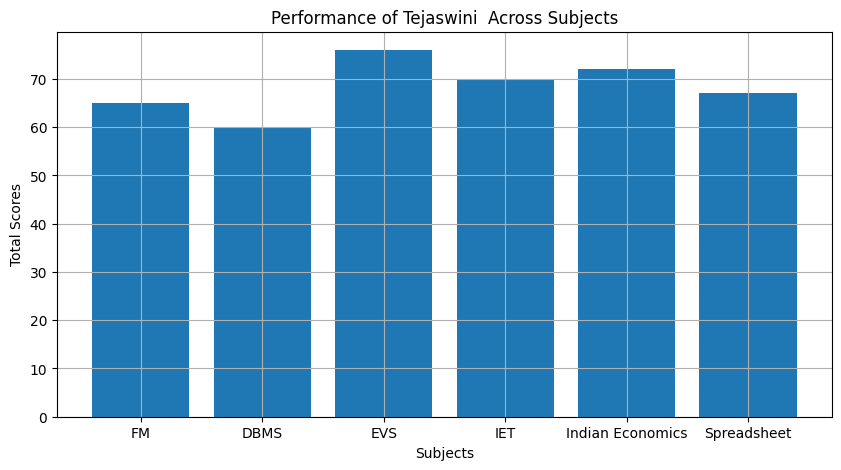

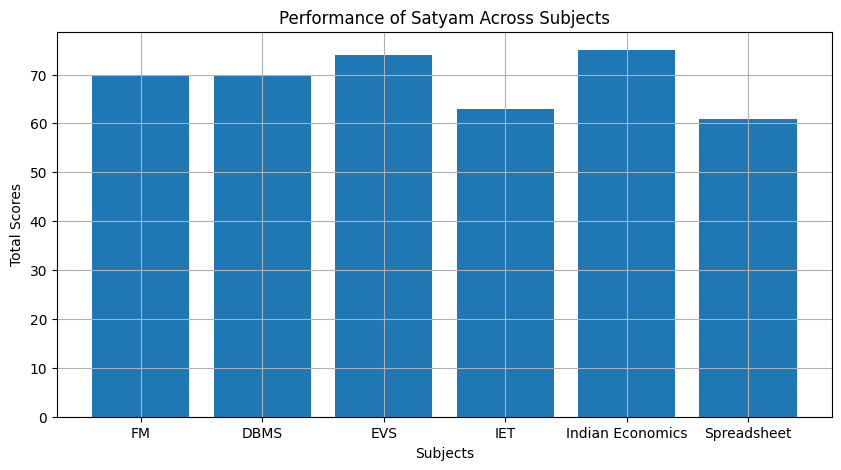

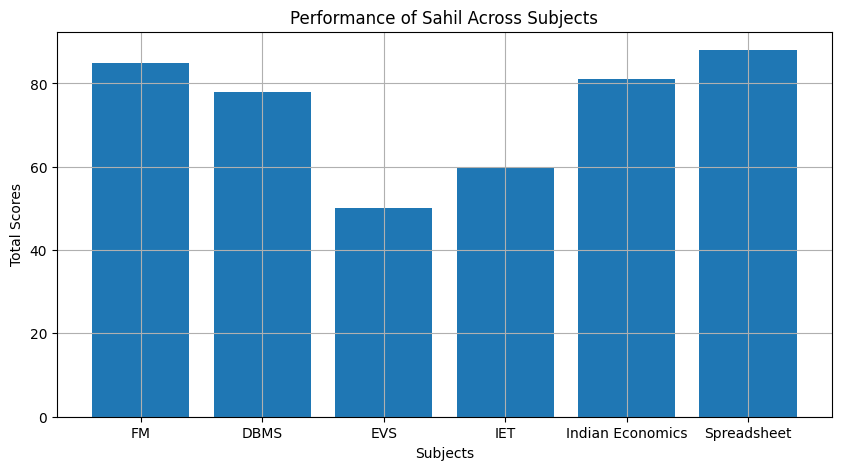

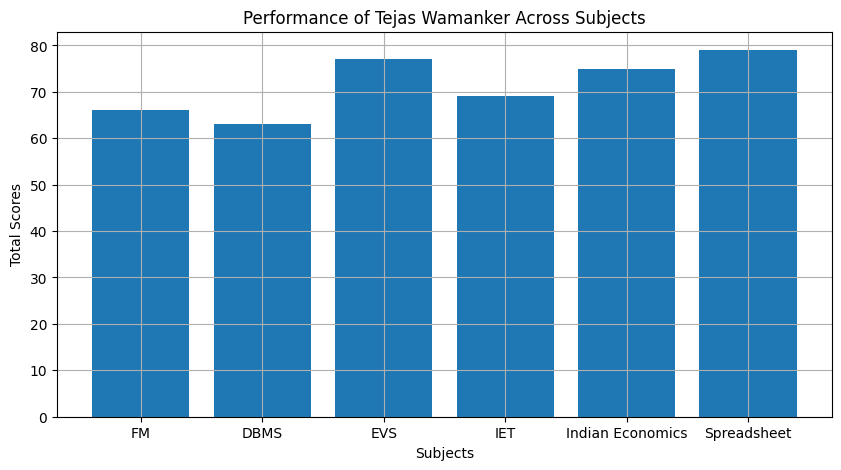

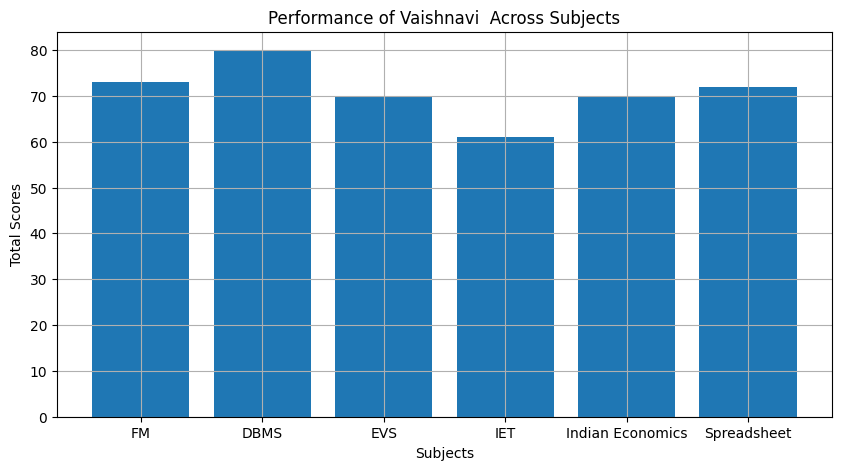

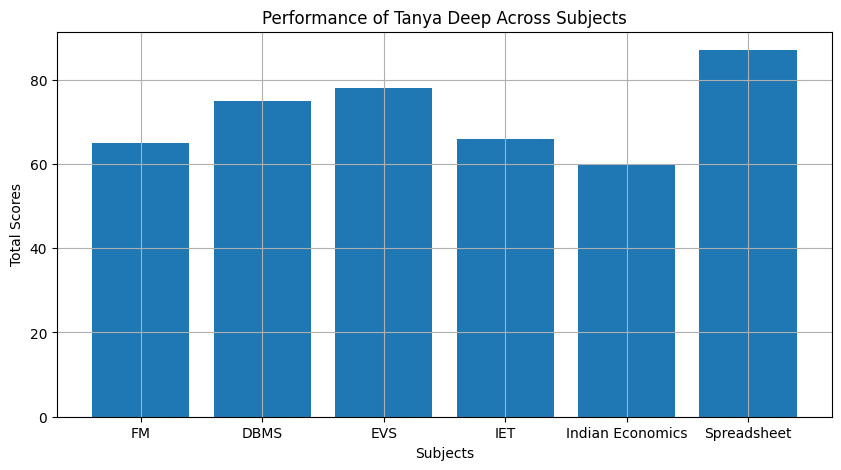

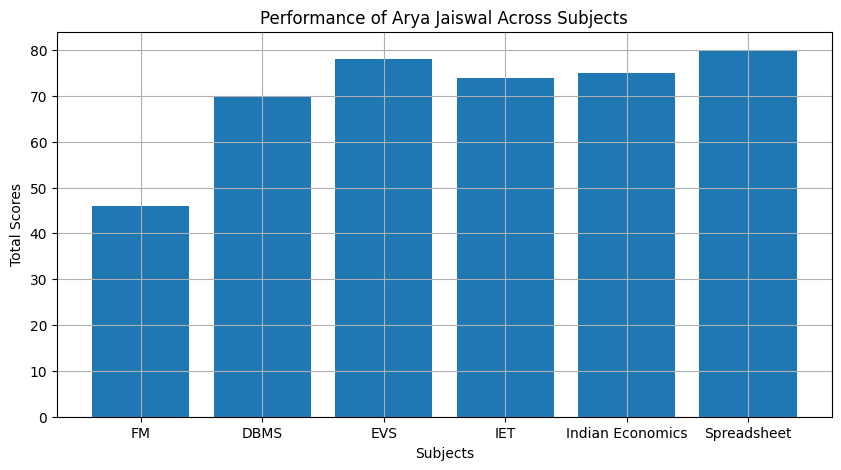

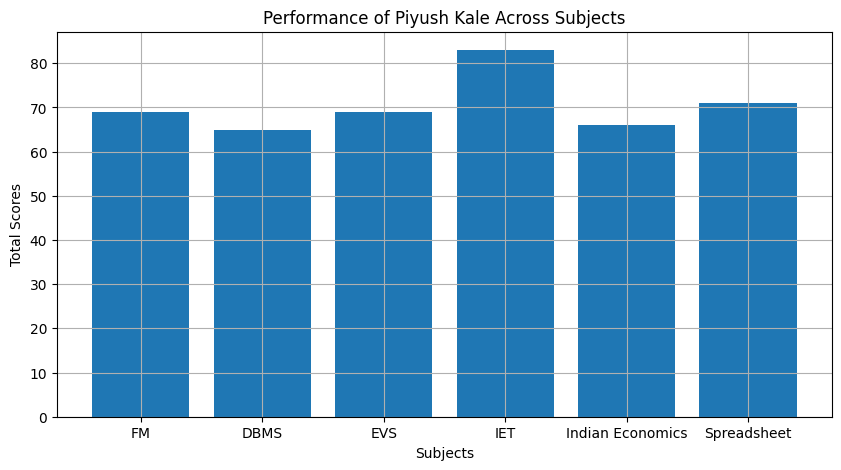

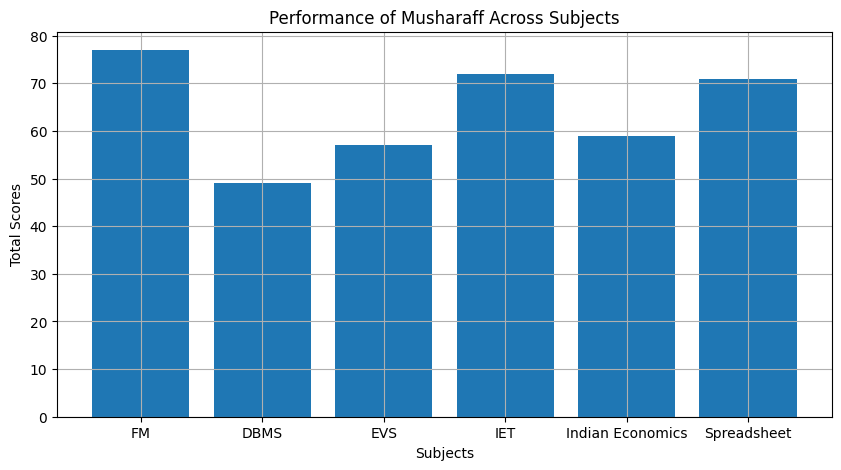

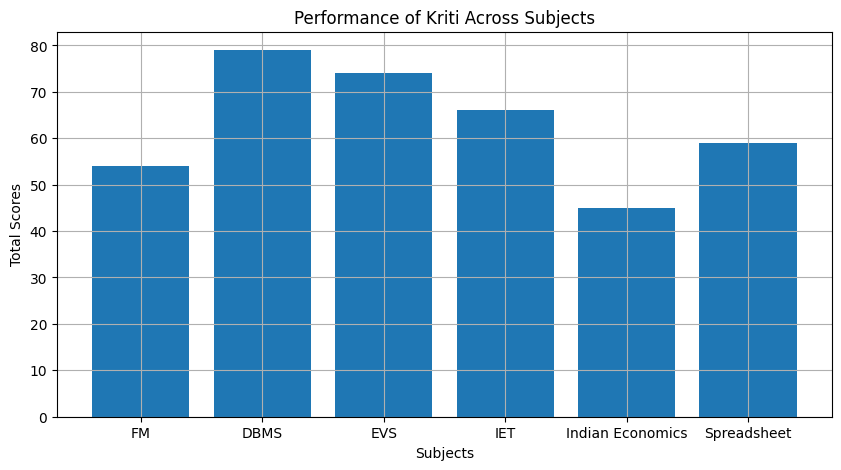

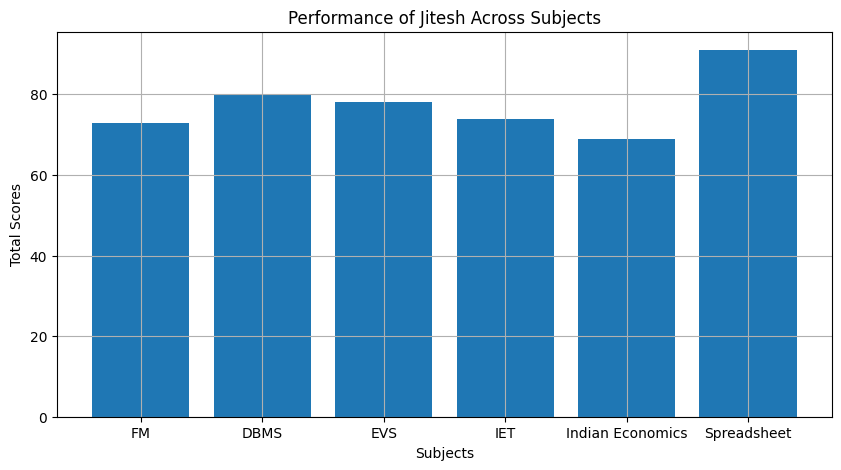

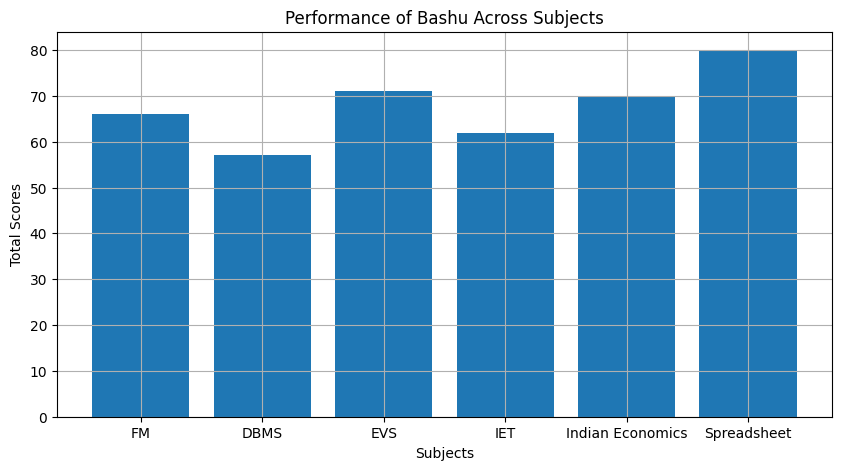

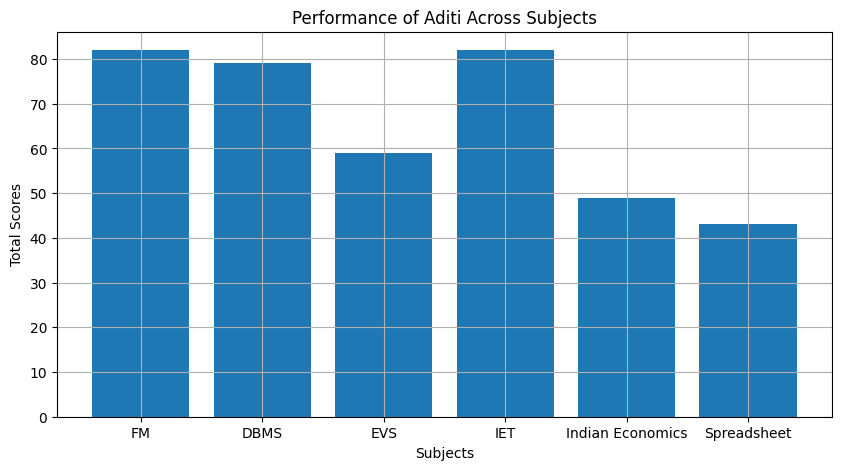

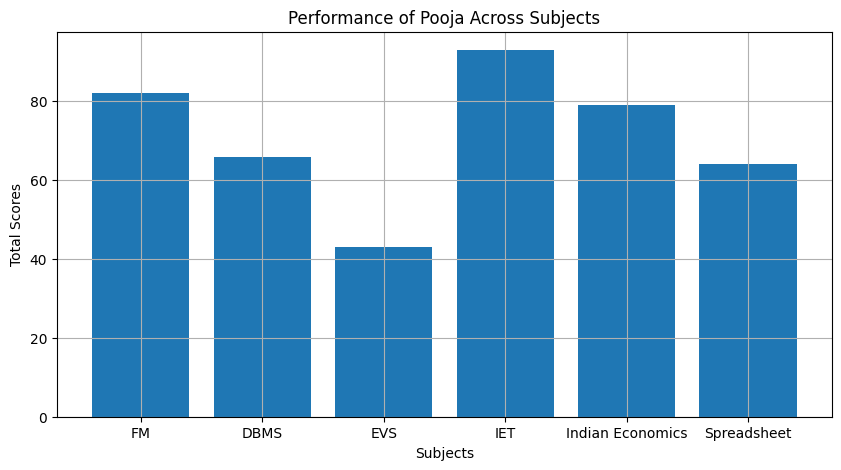

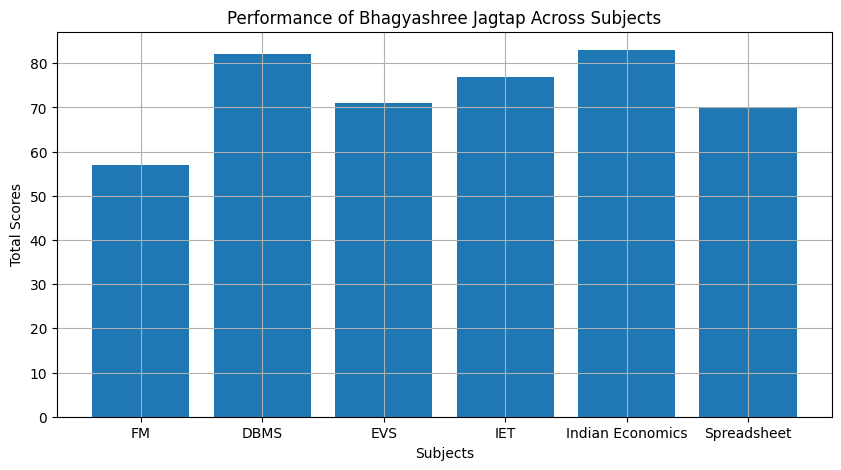

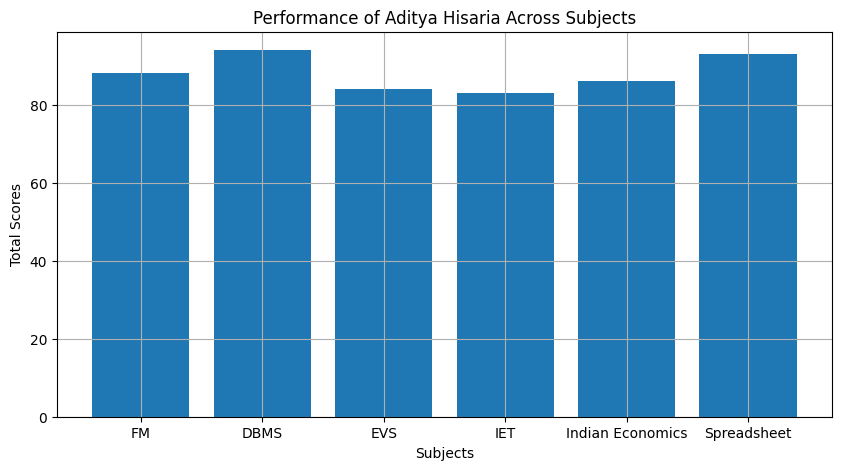

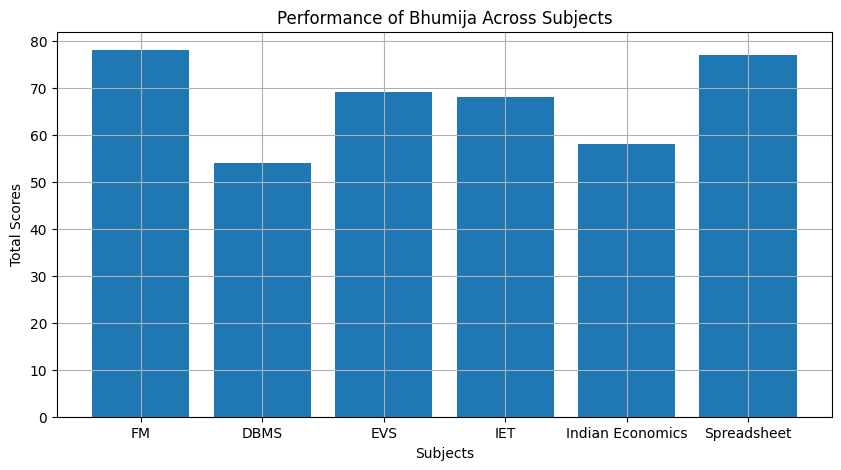

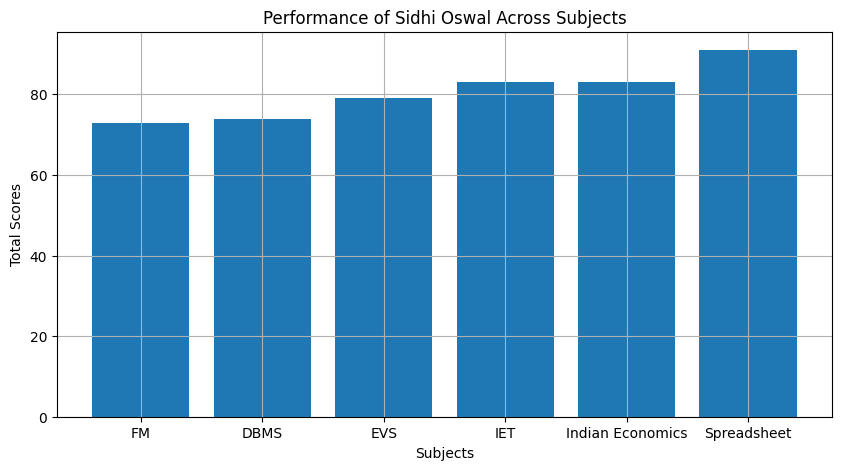

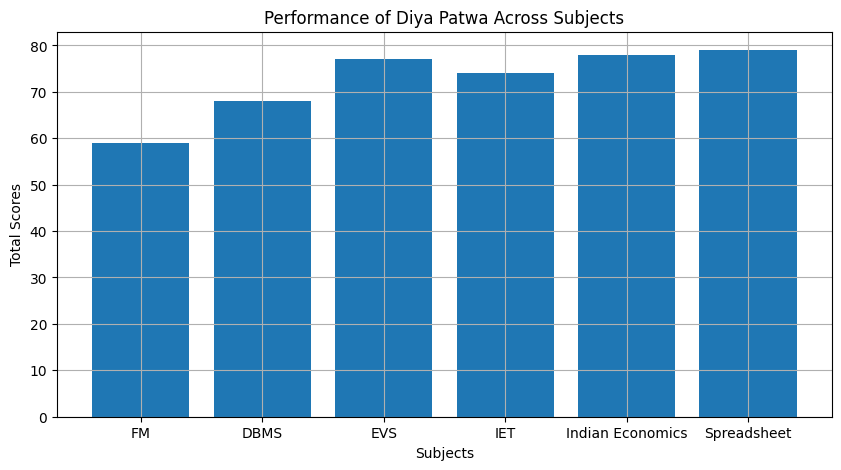

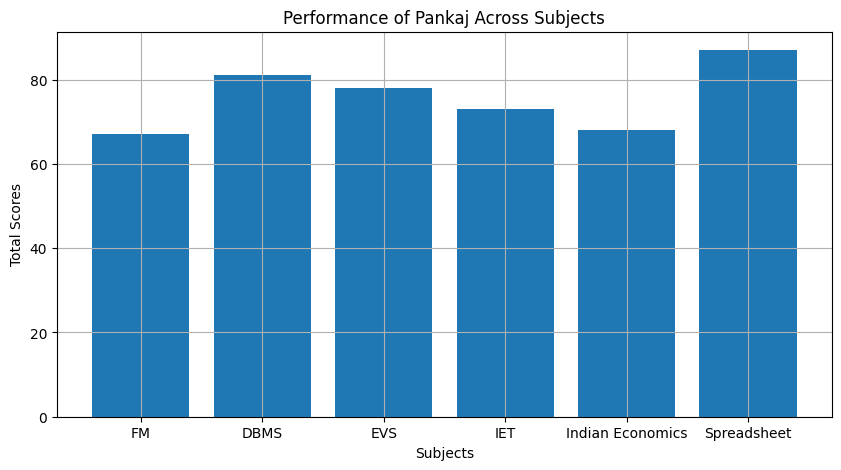

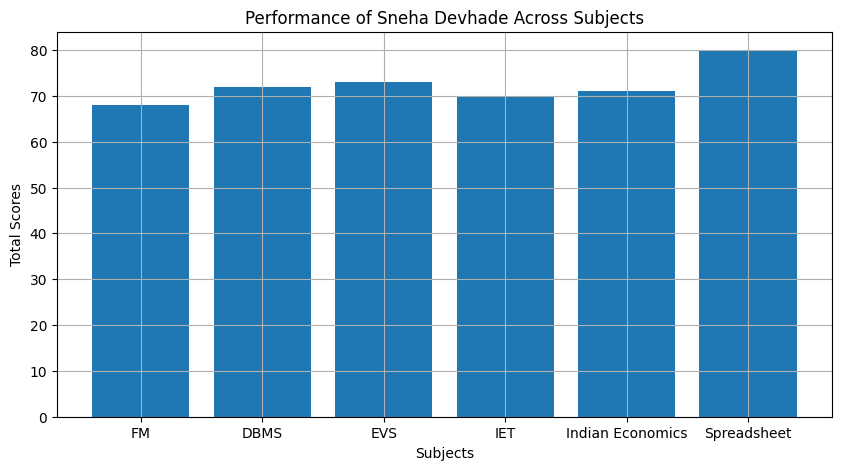

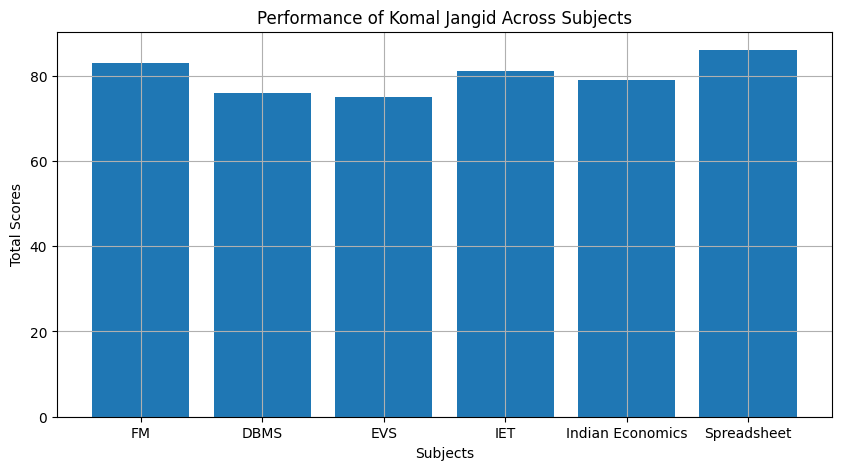

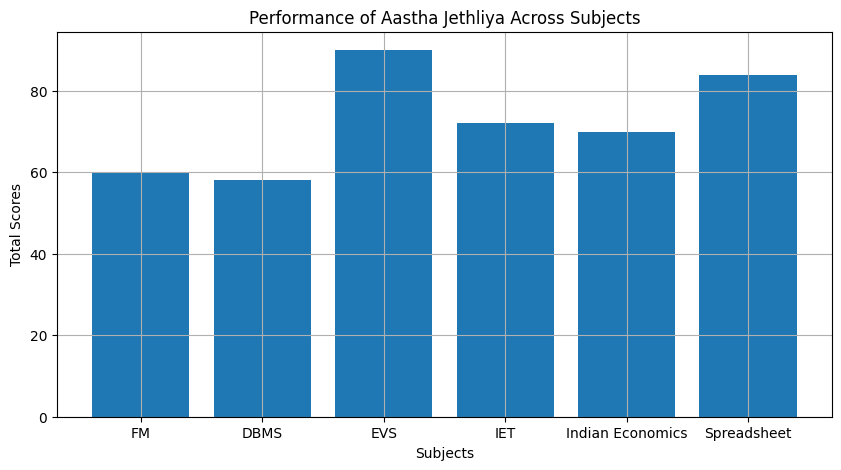

In [22]:
import matplotlib.pyplot as plt
for idx in range(len(df)):
    student_name = df.loc[idx, 'Name']
    student_scores = df.loc[idx, ['Total of FM', 'Total of DBMS', 'Total of EVS',
                                        'Total of IET', 'Total of Indian Economics',
                                        'Total of Spreadsheet']].values

    plt.figure(figsize=(10, 5))
    plt.bar(['FM', 'DBMS', 'EVS', 'IET', 'Indian Economics', 'Spreadsheet'], student_scores)
    plt.title(f"Performance of {student_name} Across Subjects")
    plt.xlabel("Subjects")
    plt.ylabel("Total Scores")
    plt.grid(True)
    plt.show()


In [23]:
# Calculate the overall average score for each student
df['Average Score'] = df[['Total of FM', 'Total of DBMS', 'Total of EVS',
                           'Total of IET', 'Total of Indian Economics',
                           'Total of Spreadsheet']].mean(axis=1)

# Set thresholds for consistently good and poor performance
good_threshold = df['Average Score'].quantile(0.75)  # Top 25%
poor_threshold = df['Average Score'].quantile(0.25)  # Bottom 25%

# Identify consistently good and poor performers
good_performers = df[df['Average Score'] >= good_threshold]['Name'].tolist()
poor_performers = df[df['Average Score'] <= poor_threshold]['Name'].tolist()

print("Consistently Good Performers:")
for student in good_performers:
  print(student)

print("\nConsistently Poor Performers:")
for student in poor_performers:
  print(student)


Consistently Good Performers:
Sharayu Dhale
Vidhi Assudani
Sundaram
Mishruti Patel
Harshwardhan
Shubhashree
Anisha
Samridhi
sneha kumari
Aditya Hisaria
Sidhi Oswal
Komal Jangid

Consistently Poor Performers:
Sneha Sinha
Yash Lawte
Rasika
Dev
Tejaswini 
Satyam
Arya Jaiswal
Piyush Kale
Musharaff
Kriti
Bashu
Aditi
Bhumija


* There are total 12 students who performaance is consistently good whereas there are 13 students whose perfromance is consistently poor.

In [24]:
total_cols = ['Total of FM', 'Total of DBMS', 'Total of EVS', 'Total of IET', 'Total of Indian Economics', 'Total of Spreadsheet']
average_scores = df[total_cols].mean()
total_cols = ['Total of FM', 'Total of DBMS', 'Total of EVS', 'Total of IET', 'Total of Indian Economics', 'Total of Spreadsheet']
df['Total_Marks'] = df[total_cols].sum(axis=1)
df

,Rollno,Name,Internal,End Term,Total of FM,Internal.1,End Term.1,Total of DBMS,Internal.2,End Term.2,...,Total of IET,Internal.5,End Term.5,Total of Indian Economics,Internal.6,End Term.6,Total of Spreadsheet,Total,Average Score,Total_Marks
0,BBA22006,Sharayu Dhale,26,55,81,25,60,85,22,40,...,83,26,64,90,25,62,87,581,86.500000,519
1,BBA22016,Vikramkumar,24,50,74,26,55,81,23,65,...,82,21,58,79,25,58,83,563,79.166667,475
2,BBA22030,Vidhi Assudani,25,65,90,25,48,73,22,58,...,83,20,65,85,28,45,73,564,80.666667,484
3,BBA22033,Lav Choudhary,20,52,72,23,52,75,20,64,...,69,19,49,68,27,62,89,538,75.666667,454
4,BBA22038,Nisha Shaw,21,52,73,18,48,66,25,52,...,63,24,65,89,21,50,71,508,71.833333,431
5,BBA22041,Shivam Kumar,25,67,92,16,52,68,24,42,...,79,25,65,90,20,38,58,519,75.500000,453
6,BBA22042,Aryan Phale,26,45,71,19,65,84,26,49,...,71,21,62,83,29,36,65,535,76.666667,460
7,BBA22043,Sundaram,28,50,78,20,40,60,22,45,...,83,25,55,80,24,69,93,544,79.500000,477
8,BBA22044,Sneha Sinha,25,55,80,20,46,66,28,56,...,61,21,43,64,25,45,70,504,70.000000,420
9,BBA22053,Mishruti Patel,20,56,76,29,62,91,22,68,...,92,27,55,82,21,44,65,570,80.000000,480


 * **9.Predict Student's Performance:**

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Features (Internal marks)
x = df[internal_marks]

# Target variable (Total Marks)
target = df['Total_Marks']

X_train, X_test, y_train, y_test = train_test_split(x, target, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Example prediction for a new student (replace with actual internal marks)
new_student_internal_marks = [[20, 18, 19, 17, 22, 21, 16]]
predicted_total_marks = model.predict(new_student_internal_marks)
print(f"Predicted Total Marks for new student: {predicted_total_marks[0]}")


Mean Squared Error: 895.6723375659161
Predicted Total Marks for new student: 399.25395002499005


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
